In [40]:
import sys

import numpy as np
import matplotlib.pyplot as plt

In [41]:
def schema_1(y, sigma):
    return y - sigma * (y - np.roll(y, 1))

def schema_2(y, sigma):
    return y - (np.roll(y, -1) - np.roll(y, 1)) / 2 * sigma + sigma ** 2 * 2 * (np.roll(y, -1) - 2 * y + np.roll(y, 1))

schemas = (schema_1, schema_2)

In [42]:
def condition(x):
    return np.sin(4 * np.pi * x / 20)

In [43]:
def draw_3D_plot(h, sigma, T, u, schema):
    tau = h * sigma
    fig = plt.figure()
    plt.title(f"h = {h}, tau = {tau}, схема {schema}")
    ax = plt.axes(projection='3d')
    ax.contour3D(np.array([i * h for i in range(int(L / h) + 1)]), np.array([i * tau for i in range(int(T / tau))]), u, 100, )
    ax.view_init(30, 90)


In [44]:
T = 18
h = 0.5
# sigma = 1
# tau = h * sigma
L = 20

def method(h, sigma, T, schema):
    x = np.linspace(0, L, int(L / h) + 1)
    tau = h * sigma
    u_0 = condition(x)
#     print(u_0.shape)
    u = np.array([u_0] * int(T / tau))

    for i in range(1, int(T / tau)):
        u[i] = schema(u[i - 1], sigma)
        
#         if i == 30:
        
#             print(u[i])
#             plt.plot(u[i])
        
        
    return u

def get_plot(h, sigma, T, schema, schem_title):
    sol = method(h, sigma, T, schema)
    draw_3D_plot(h, sigma, T, sol, schem_title)
    return sol
    

[[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]
(36, 41) 0 0 0
??? (36, 41) ???
(36, 41) 1 0 0
??? (36, 41) ???
(60, 41) 0 0 1
??? (36, 41) ???
(60, 41) 1 0 1
??? (36, 41) ???
(120, 41) 0 0 2
??? (36, 41) ???
(120, 41) 1 0 2
??? (36, 41) ???
(72, 81) 0 1 0
??? (72, 81) ???
(72, 81) 1 1 0
??? (72, 81) ???
(120, 81) 0 1 1
??? (72, 81) ???
(120, 81) 1 1 1
??? (72, 81) ???
(240, 81) 0 1 2
??? (72, 81) ???
(240, 81) 1 1 2
??? (72, 81) ???
(144, 161) 0 2 0
??? (144, 161) ???
(144, 161) 1 2 0
??? (144, 161) ???
(240, 161) 0 2 1
??? (144, 161) ???
(240, 161) 1 2 1
??? (144, 161) ???
(480, 161) 0 2 2
??? (144, 161) ???
(480, 161) 1 2 2
??? (144, 161) ???
////// (144, 161) //////


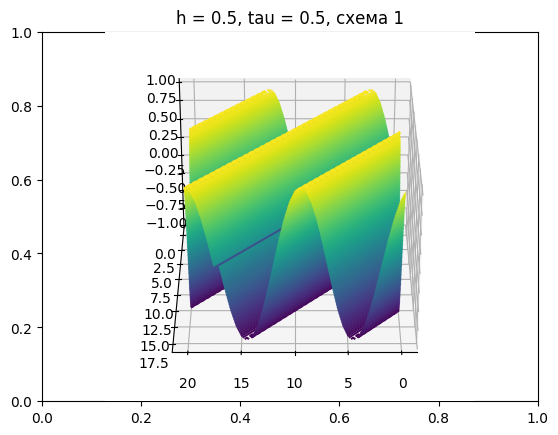

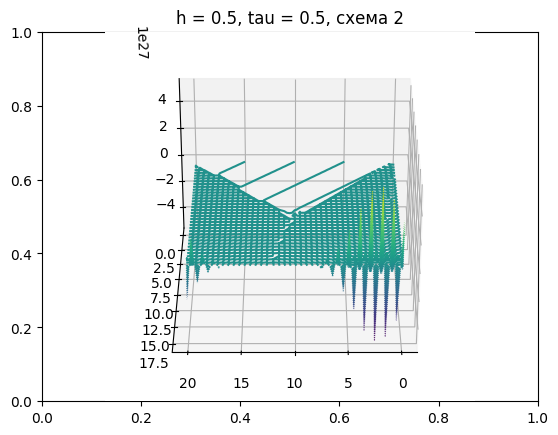

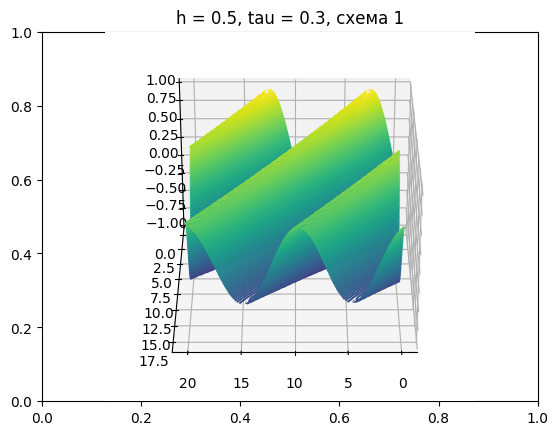

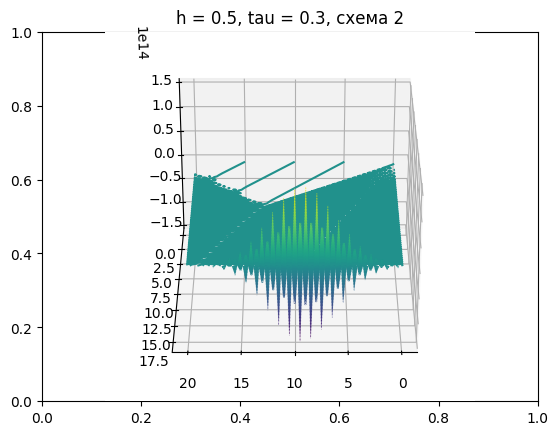

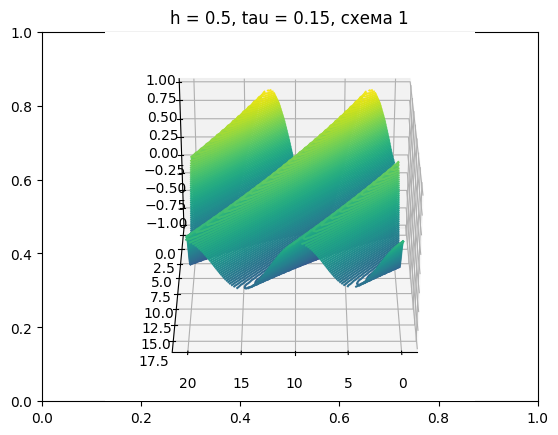

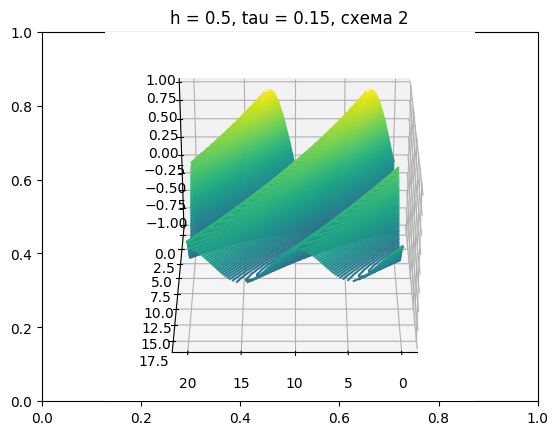

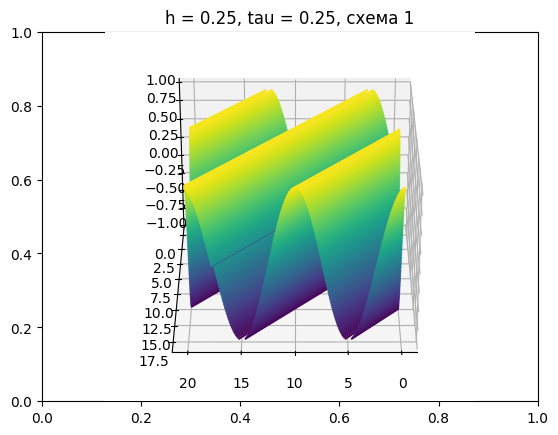

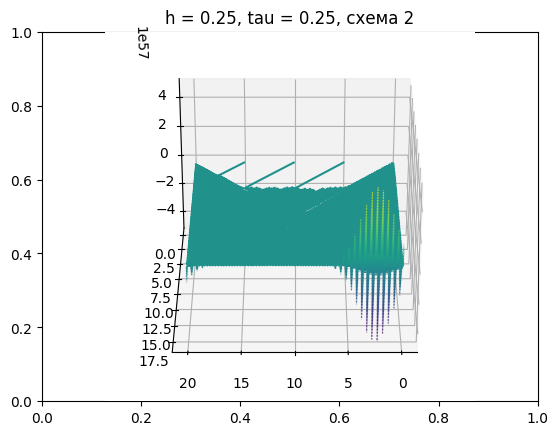

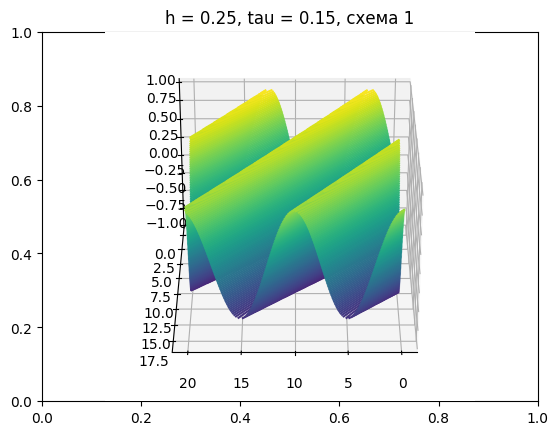

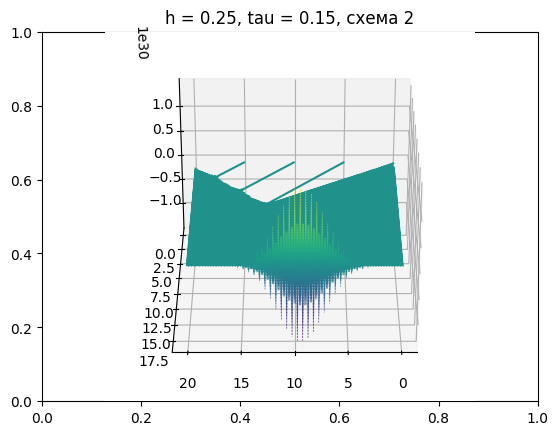

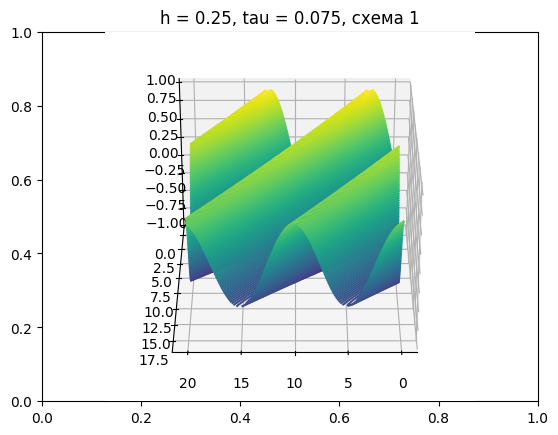

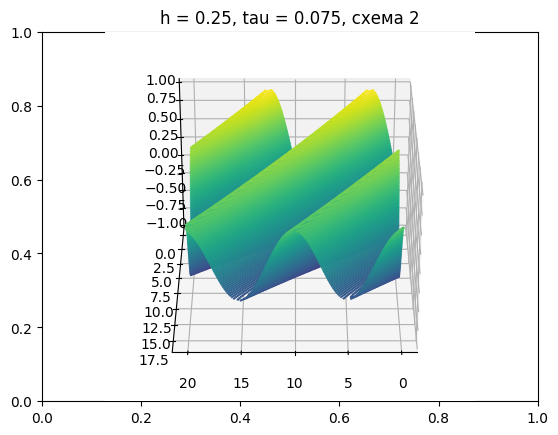

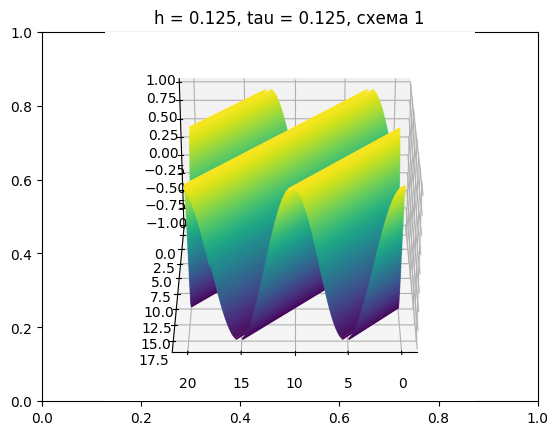

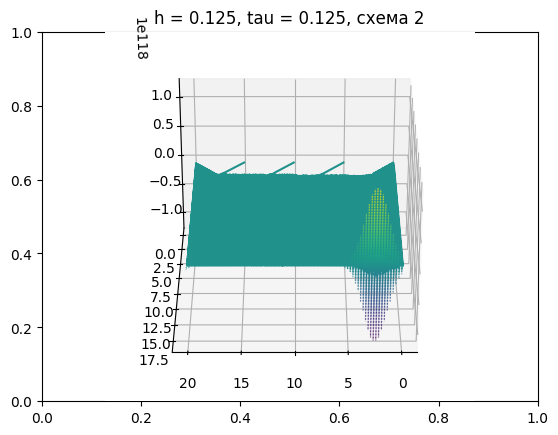

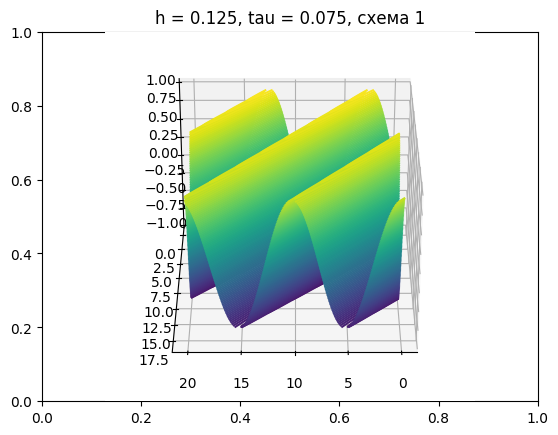

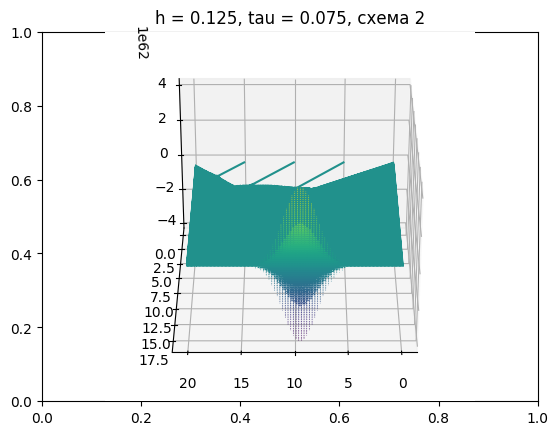

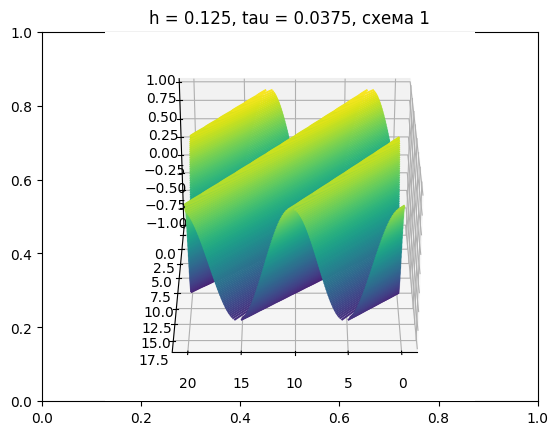

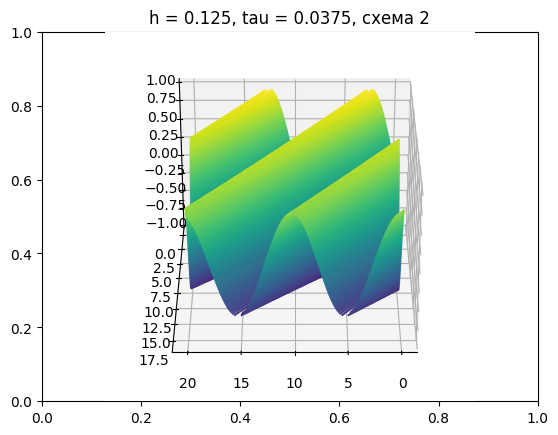

In [45]:
solutions = [[[0] * 3] * 3] * 2
print(solutions)


for j, h_i in enumerate((h, h / 2, h / 4)):
    for k, sigma_i in enumerate((1, 0.6, 0.3)):
        for i, schema in enumerate(schemas):
            
            arr = get_plot(h_i, sigma_i, T, schema, str(i + 1))
            print(arr.shape, i, j, k)
            solutions[i][j][k] = arr
            print("???", solutions[0][1][0].shape, "???")
print("//////", solutions[0][0][0].shape, "//////")

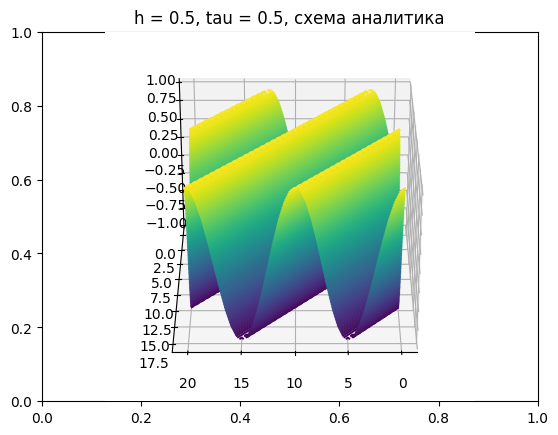

In [46]:
def analitical_solution(x, t):
    return condition(x - t)


def get_analitical_solution(h, sigma):
    x = np.linspace(0, L, int(L / h) + 1)
    tau = h * sigma
    u_0 = condition(x)
    u = np.array([u_0] * int(T / tau))
    for i in range(1, int(T / tau)):
        u[i] = analitical_solution(x, i * tau)
    return u
        
u = get_analitical_solution(0.5, 1)
draw_3D_plot(0.5, 1, T, u, "аналитика")

In [47]:
# for i in range(3):
#     print(np.shape(solutions[0][0][0]))
#     print(np.max(solutions[0][i][0] - get_analitical_solution(0.5 / 2 ** (i), 1)))

#### 